In [1]:
# This notebook is for voxel-wise correlation of functional and structural gradients parcellation used are HCPMMP.

# Includes:
#     laoding gradient data
#     gradient distribution histogram
#     gradient correlations

In [1]:
import os
from numpy import load
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import nibabel as nib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

### Setting the path

In [63]:
# get the current notebook path
note_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/notebook/"
data_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/data/"
results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Grad_corr/"
fig_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/figures/Grad_corr/"

In [64]:
Func_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Func_HCPMMP/"
Diff_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Diff_7Tsubj7TDWI/"

In [65]:
Sch_Func_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Func_Schaefer/"
UR100_Diff_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Diff_UR100/"

### Loading gradient data

In [66]:
func_gm = pd.read_csv(Func_results_path + 'Func_HCPMMP_gradients_seed-BASF_1p6mm.csv')
diff_gm = pd.read_csv(Diff_results_path + 'Diff_7Tsubj7TDWI_gradients_seed-BASF_0p7mm.csv')

In [67]:
Sch_func_gm = pd.read_csv(Sch_Func_results_path + 'Func_Schaefer_gradients_seed-BASF_1p6mm.csv')
UR100_diff_gm = pd.read_csv(UR100_Diff_results_path + 'Diff_UR100_gradients_seed-BASF_0p7mm.csv')

In [69]:
func_gm

,0,1,2,3,4,5,6,7,8,9
0,0.151822,-0.047482,-0.013830,0.049574,0.014777,0.001523,-0.011459,-0.004889,0.004044,-0.000922
1,-0.172966,0.054630,-0.005035,0.001567,0.008826,0.007191,0.003783,-0.010360,-0.004866,-0.007757
2,-0.129850,0.004093,0.033544,-0.003277,0.011646,0.007041,-0.006514,-0.007988,-0.010824,0.003299
3,-0.055277,-0.058552,0.059570,-0.004472,-0.009255,-0.003987,-0.004555,-0.003294,0.000969,0.008004
4,0.049931,-0.116084,0.039588,0.028193,-0.025803,-0.010164,0.002144,-0.006117,-0.002433,-0.010214
...,...,...,...,...,...,...,...,...,...,...
594,-0.176536,0.078773,-0.020059,0.002060,-0.001262,0.003503,0.009146,0.007067,0.011968,-0.002012
595,-0.174797,0.077244,-0.020867,0.001693,-0.001434,0.003406,0.009339,0.007041,0.012063,-0.002024
596,-0.190892,0.083946,-0.012693,0.005197,0.003485,0.002261,0.004763,0.008864,-0.000261,-0.006562
597,-0.177774,0.064819,0.015225,0.003618,0.008694,-0.003207,-0.006572,0.012575,-0.009891,-0.004569


### Gradient distribution histogram

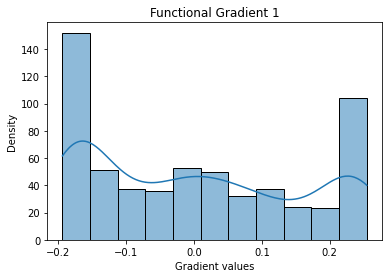

In [85]:
ax = sns.histplot(data=func_gm, x="0", kde=True)
ax.set(xlabel='Gradient values', ylabel='Density')
plt.title("Functional Gradient 1")
plt.show()

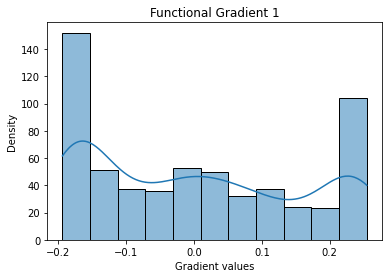

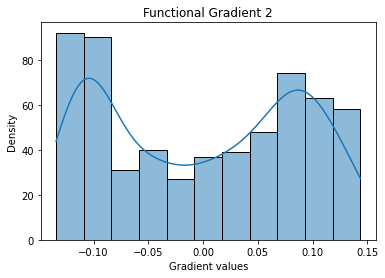

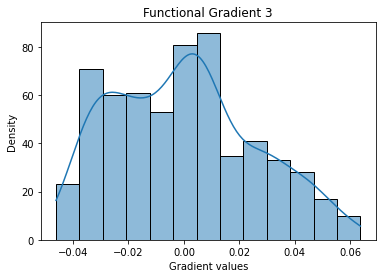

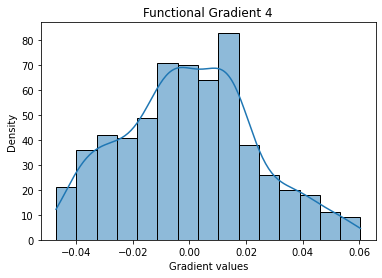

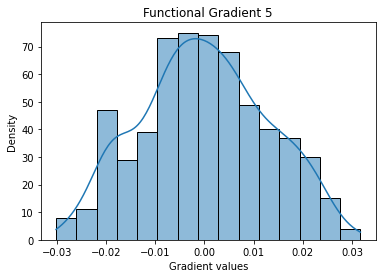

In [70]:
for gradi in range(5):
    ax = sns.histplot(data=func_gm, x=str(gradi), kde=True)
    ax.set(xlabel='Gradient values', ylabel='Density')
    plt.title("Functional Gradient " + str(gradi+1))
    plt.savefig(fig_path + f'Func_HCPMMP_BF_Gradient_histogram_'+ str(gradi+1)+'.png', dpi=300)
    plt.show()

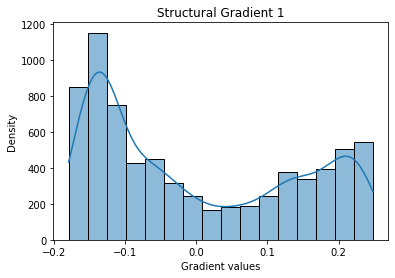

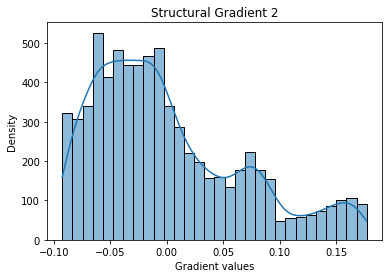

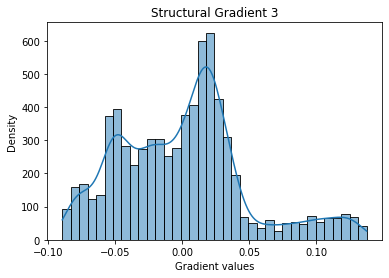

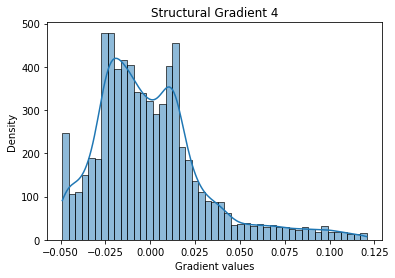

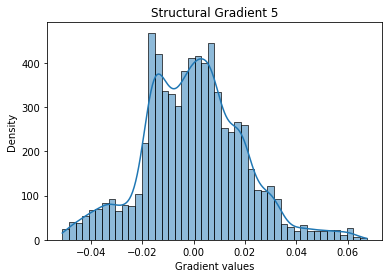

In [144]:
for gradi in range(5):
    ax = sns.histplot(data=diff_gm, x=str(gradi), kde=True)
    ax.set(xlabel='Gradient values', ylabel='Density')
    plt.title("Structural Gradient " + str(gradi+1))
    plt.savefig(fig_path + f'Diff_7Tsubj7TDWI_BF_Gradient_histogram_'+ str(gradi+1)+'.png', dpi=300)
    plt.show()

### BF color-code

In [196]:
Func_G1 = nib.load(Func_results_path + 'Func_HCPMMP_gradient_0.nii.gz').get_fdata()
Diff_G1 = nib.load(Diff_results_path + 'Diff_7Tsubj7TDWI_gradient_0.nii.gz').get_fdata()

In [197]:
Func_G1_idx = np.argwhere(Func_G1)
Diff_G1_idx = np.argwhere(Diff_G1)

In [198]:
Func_G1_values = Func_G1[Func_G1_idx[:,0], Func_G1_idx[:,1], Func_G1_idx[:,2]]
Diff_G1_values = Diff_G1[Diff_G1_idx[:,0], Diff_G1_idx[:,1], Diff_G1_idx[:,2]]

In [199]:
FuncIdx_df = pd.DataFrame(Func_G1_values)
DiffIdx_df = pd.DataFrame(Diff_G1_values)

In [202]:
DiffIdx_df.index

RangeIndex(start=0, stop=7142, step=1)

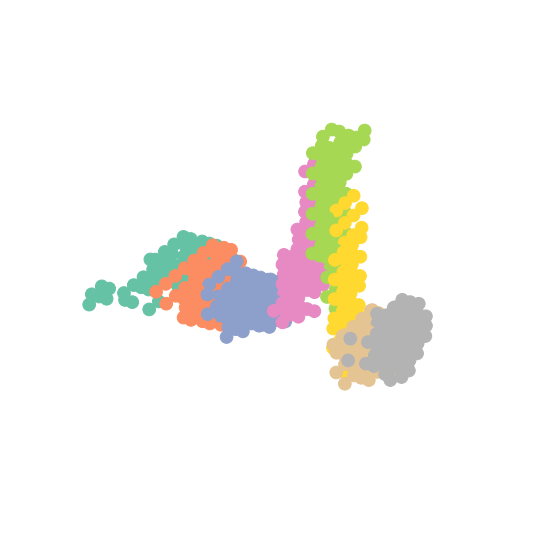

In [205]:
# Func BF color code ref
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.dist=10
ax.set_axis_off()

ax.scatter(
    Func_G1_idx[:,0],
    Func_G1_idx[:,1],
    Func_G1_idx[:,2],
    s=160, alpha=1,
    cmap='Set2',
    c=FuncIdx_df.index
)


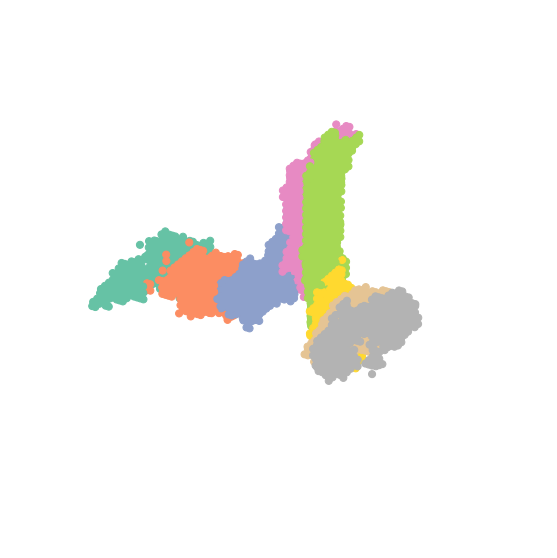

In [206]:
# Diff BF color code ref
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.dist=10
ax.set_axis_off()

ax.scatter(
    Diff_G1_idx[:,0],
    Diff_G1_idx[:,1],
    Diff_G1_idx[:,2],
    s=50, alpha=1,
    cmap='Set2', 
    c=DiffIdx_df.index
)

### Gradient correlations

#### Functional gradients

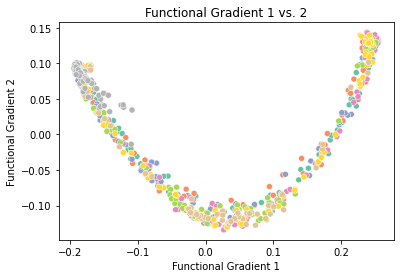

In [207]:
ax = sns.scatterplot(data=func_gm, x="0", y="1", c=FuncIdx_df.index, cmap='Set2')
ax.set(xlabel='Functional Gradient 1', ylabel='Functional Gradient 2')
plt.title("Functional Gradient 1 vs. 2")
plt.show()

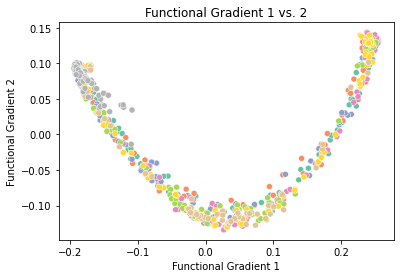

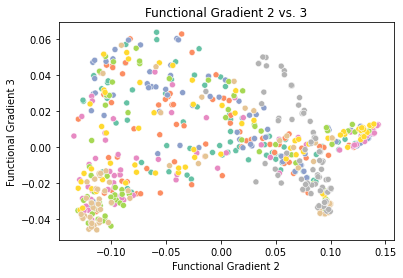

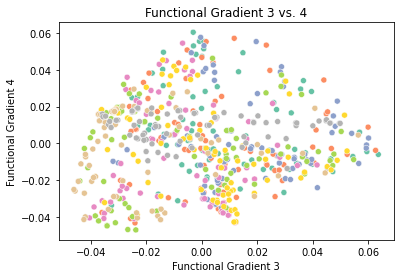

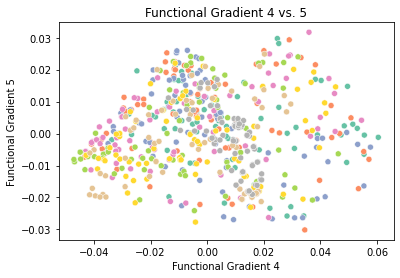

In [208]:
for gradi in range(4):
    ax = sns.scatterplot(data=func_gm, x=str(gradi), y=str(gradi+1), c=FuncIdx_df.index, cmap='Set2')
    ax.set(xlabel='Functional Gradient '+ str(gradi+1), ylabel='Functional Gradient '+ str(gradi+2))
    plt.title("Functional Gradient " + str(gradi+1) + " vs. " + str(gradi+2))
    plt.savefig(fig_path + f'Func_HCPMMP_BF_Gradient_correlation_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)
    plt.show()

#### Sructural gradients

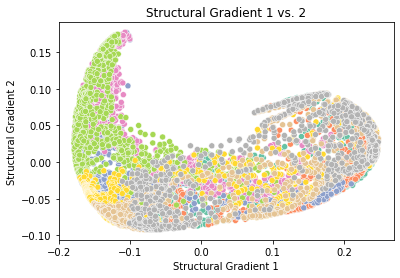

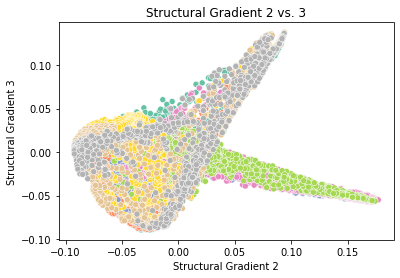

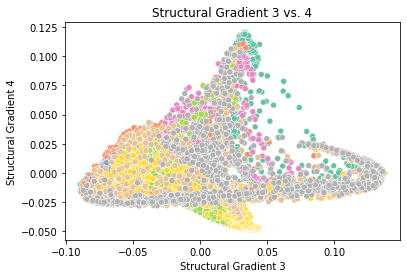

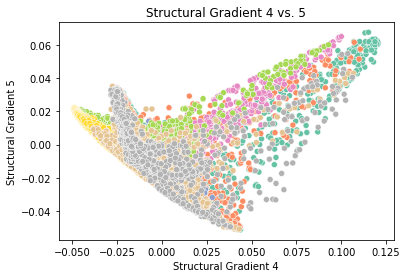

In [209]:
for gradi in range(4):
    ax = sns.scatterplot(data=diff_gm, x=str(gradi), y=str(gradi+1), c=DiffIdx_df.index, cmap='Set2')
    ax.set(xlabel='Structural Gradient '+ str(gradi+1), ylabel='Structural Gradient '+ str(gradi+2))
    plt.title("Structural Gradient " + str(gradi+1) + " vs. " + str(gradi+2))
    plt.savefig(fig_path + f'Diff_7Tsubj7TDWI_BF_Gradient_correlation_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)
    plt.show()

#### Functional x Structural

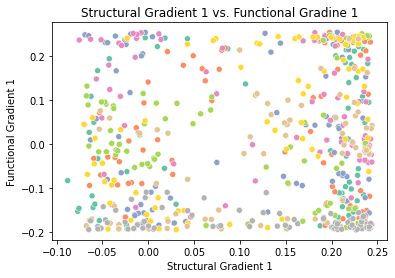

In [210]:
ax = sns.scatterplot(x=diff_gm["0"], y=func_gm["0"], c=FuncIdx_df.index, cmap='Set2')
ax.set(xlabel='Structural Gradient 1', ylabel='Functional Gradient 1')
plt.title("Structural Gradient 1 vs. Functional Gradine 1")
plt.show()

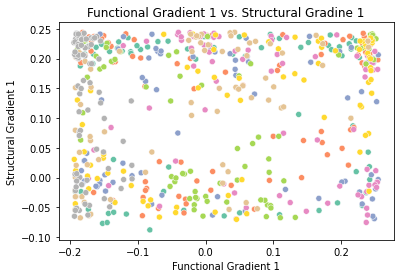

In [211]:
ax = sns.scatterplot(x=func_gm["0"], y=diff_gm["0"], c=FuncIdx_df.index, cmap='Set2')
ax.set(xlabel='Functional Gradient 1', ylabel='Structural Gradient 1')
plt.title("Functional Gradient 1 vs. Structural Gradine 1")
plt.show()

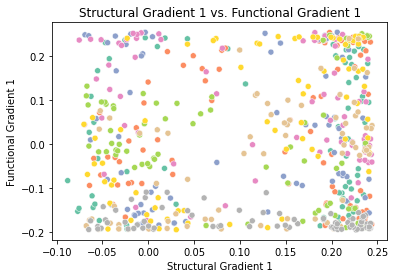

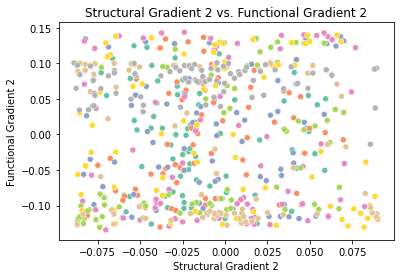

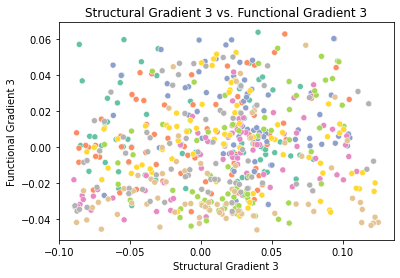

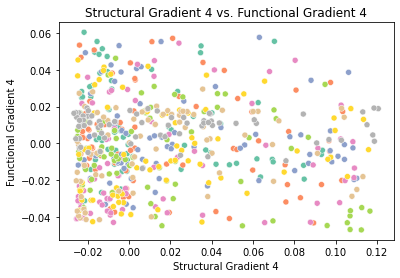

In [212]:
for gradi in range(4):
    ax = sns.scatterplot(x=diff_gm[str(gradi)], y=func_gm[str(gradi)], c=FuncIdx_df.index, cmap='Set2')
    ax.set(xlabel='Structural Gradient '+ str(gradi+1), ylabel='Functional Gradient '+ str(gradi+1))
    plt.title("Structural Gradient " + str(gradi+1) + " vs. Functional Gradient " + str(gradi+1))
    plt.savefig(fig_path + f'BF_Gradient_correlation_Structural_vs_Functional_Gradient_'+ str(gradi+1)+'.png', dpi=300)
    plt.show()

### Gradients correlation with gradient distribution

#### Functional gradients

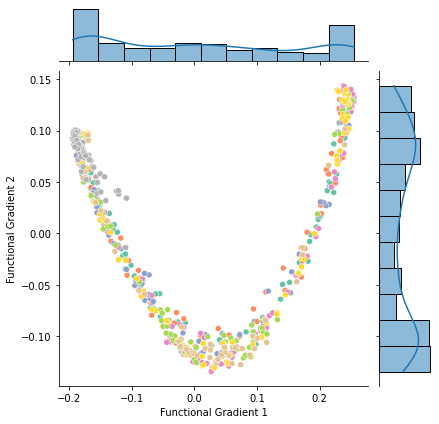

In [213]:
g = sns.JointGrid(data=func_gm, x="0", y="1")
g.plot_joint(sns.scatterplot, c=FuncIdx_df.index, cmap='Set2')
g.plot_marginals(sns.histplot, kde=True)
g.set_axis_labels(xlabel='Functional Gradient 1', ylabel='Functional Gradient 2')

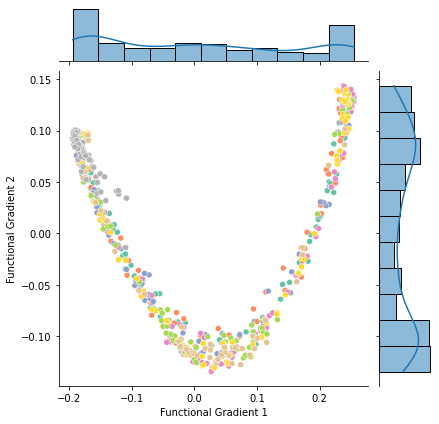

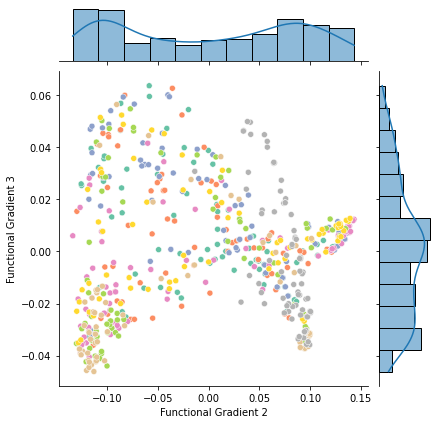

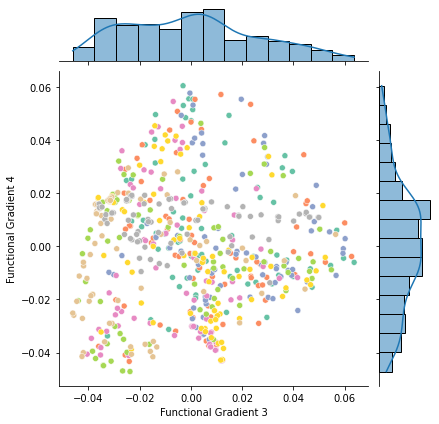

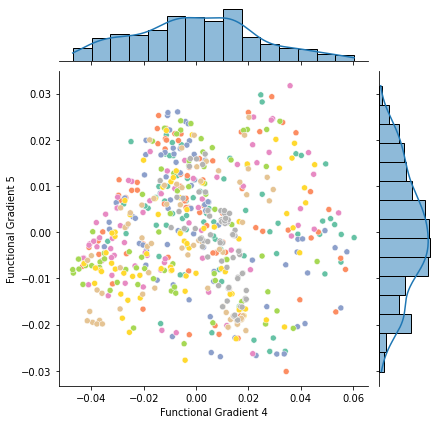

In [214]:
for gradi in range(4):
    g = sns.JointGrid(data=func_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=FuncIdx_df.index, cmap='Set2')
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Functional Gradient '+str(gradi+1), ylabel='Functional Gradient '+str(gradi+2))
    g.savefig(fig_path + f'Func_HCPMMP_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

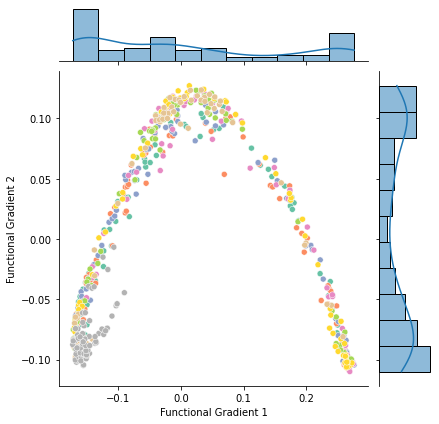

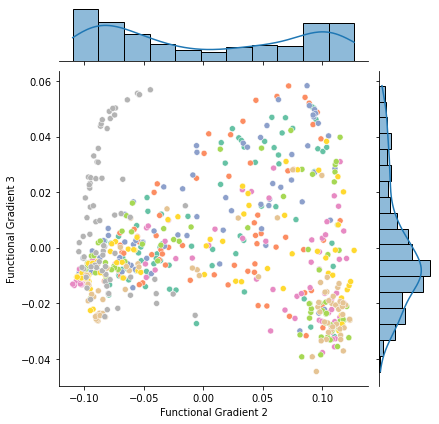

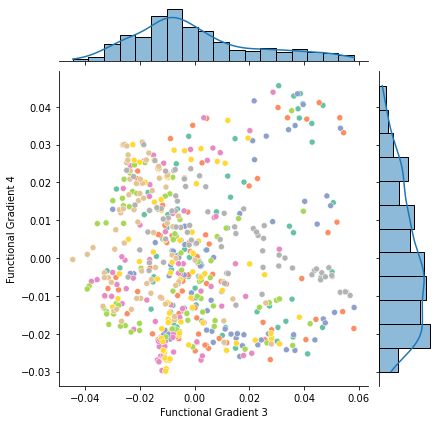

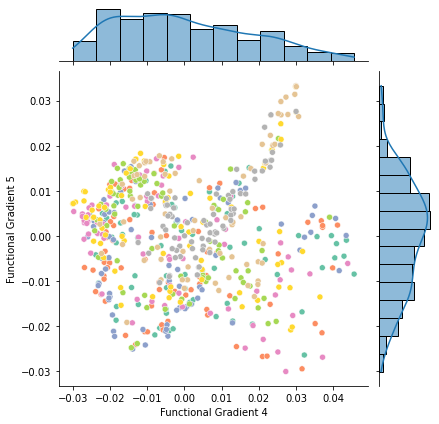

In [215]:
for gradi in range(4):
    g = sns.JointGrid(data=Sch_func_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=FuncIdx_df.index, cmap='Set2')
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Functional Gradient '+str(gradi+1), ylabel='Functional Gradient '+str(gradi+2))
    g.savefig(fig_path + f'Func_Schaefer_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

#### Structural gradients

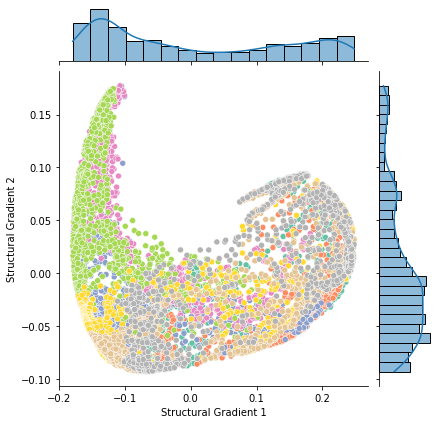

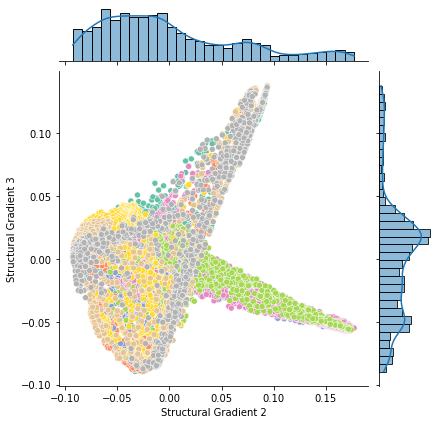

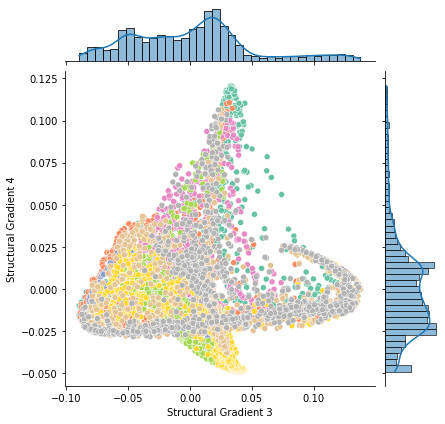

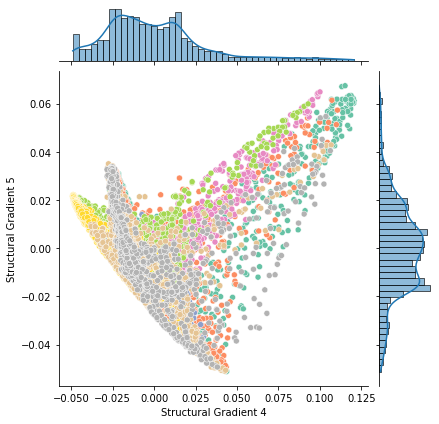

In [216]:
for gradi in range(4):
    g = sns.JointGrid(data=diff_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=DiffIdx_df.index, cmap='Set2')
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Structural Gradient '+str(gradi+1), ylabel='Structural Gradient '+str(gradi+2))
    g.savefig(fig_path + f'Diff_7Tsubj7TDWI_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

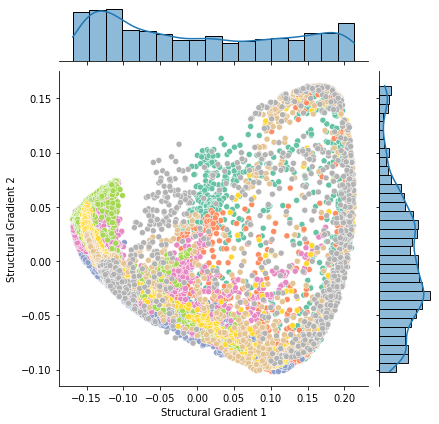

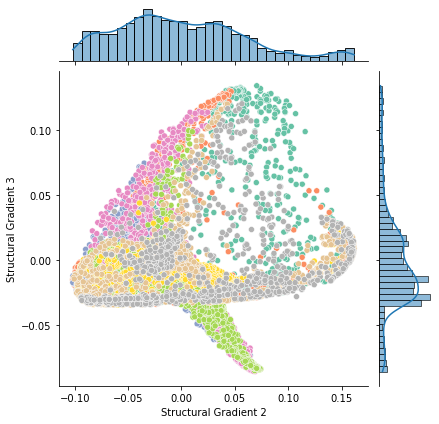

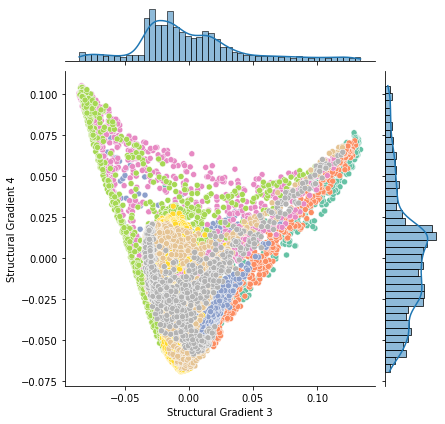

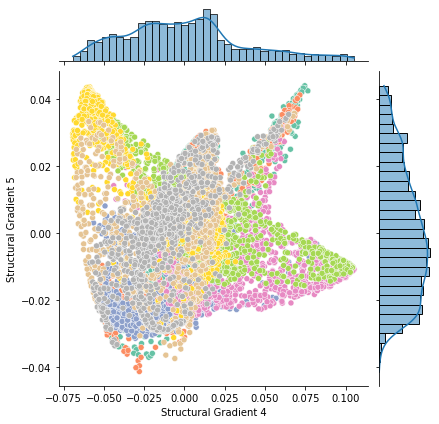

In [217]:
for gradi in range(4):
    g = sns.JointGrid(data=UR100_diff_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=DiffIdx_df.index, cmap='Set2')
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Structural Gradient '+str(gradi+1), ylabel='Structural Gradient '+str(gradi+2))
    g.savefig(fig_path + f'Diff_UR100_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

#### Functional x Structural

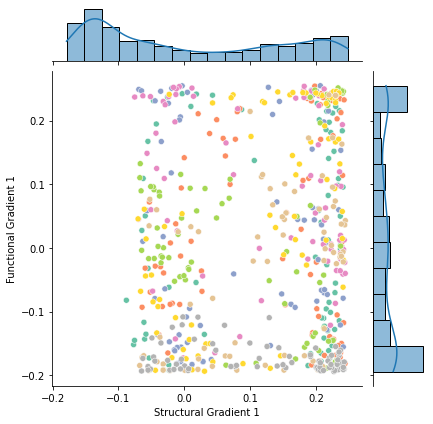

In [218]:
for gradi in range(1):
    g = sns.JointGrid(x=diff_gm[str(gradi)], y=func_gm[str(gradi)])
    g.plot_joint(sns.scatterplot, c=FuncIdx_df.index, cmap='Set2')
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Structural Gradient '+str(gradi+1), ylabel='Functional Gradient '+str(gradi+1))

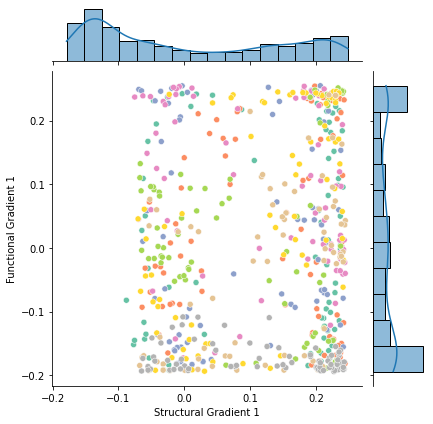

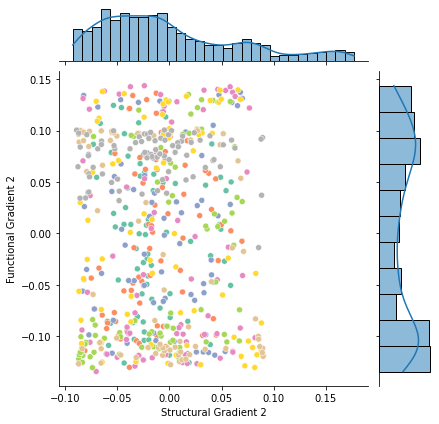

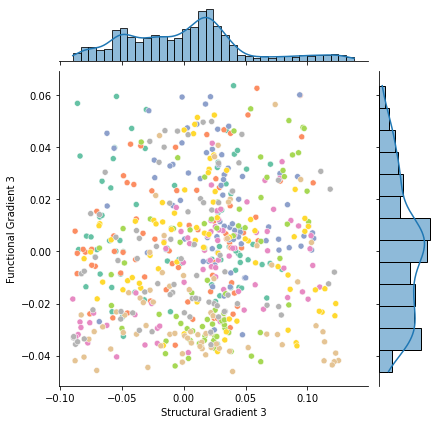

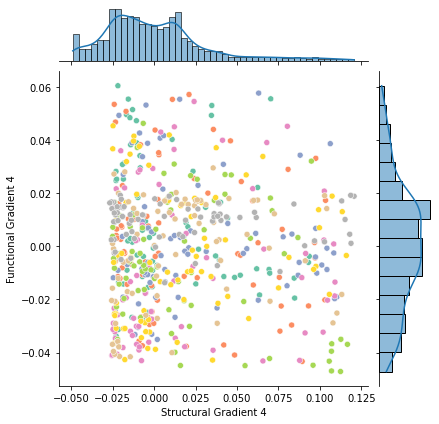

In [220]:
for gradi in range(4):
    g = sns.JointGrid(x=diff_gm[str(gradi)], y=func_gm[str(gradi)])
    g.plot_joint(sns.scatterplot, c=FuncIdx_df.index, cmap='Set2')
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Structural Gradient '+str(gradi+1), ylabel='Functional Gradient '+str(gradi+1))
    g.savefig(fig_path + f'BF_Gradient_correlation_and_distribution_HCPMMP_Structural_vs_Functional_Gradient_'+ str(gradi+1)+'.png', dpi=300)

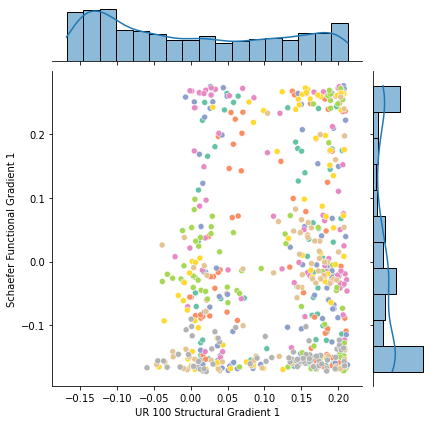

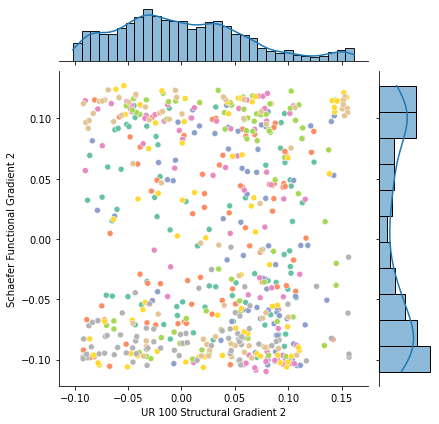

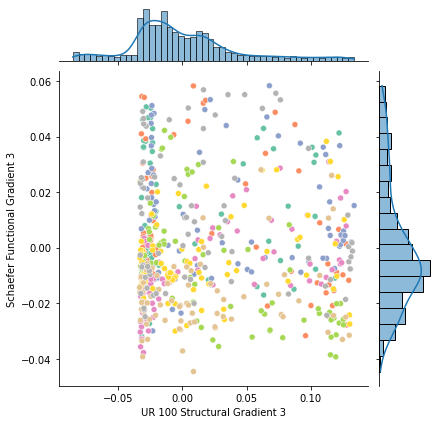

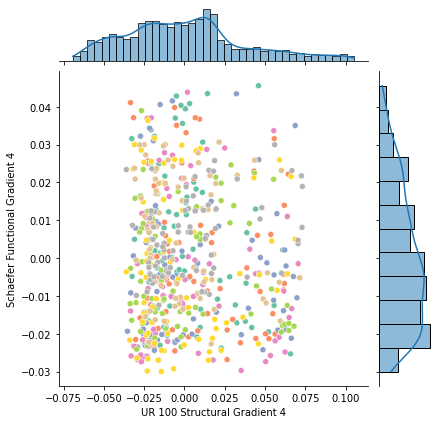

In [221]:
for gradi in range(4):
    g = sns.JointGrid(x=UR100_diff_gm[str(gradi)], y=Sch_func_gm[str(gradi)])
    g.plot_joint(sns.scatterplot, c=FuncIdx_df.index, cmap='Set2')
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='UR 100 Structural Gradient '+str(gradi+1), ylabel='Schaefer Functional Gradient '+str(gradi+1))
    g.savefig(fig_path + f'BF_Gradient_correlation_and_distribution_UR100Structural_vs_SchaeferFunctional_Gradient_'+ str(gradi+1)+'.png', dpi=300)